In [306]:
# 欧拉距离
# distances = []
# for x_train in X_train:
#     d = sqrt(np.sum(x_train - x)**2)
#     distances.append(d)
#  =>
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.neighbors import KNeighborsClassifier
from playML.metrics import plot_decision_boundary
from playML.Bayers import BayersGN
from playML.model_selection import train_test_split
X_train, y_train = np.loadtxt("X_train.csv", delimiter=","),np.loadtxt("y_train.csv", delimiter=",")
X_test, y_test =  np.loadtxt("X_test.csv", delimiter=","), np.loadtxt("y_test.csv", delimiter=",")

In [3]:
kNN_classifier = KNeighborsClassifier(n_neighbors = 6)
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

## grid search

In [19]:
param_grid =[{
        'weights':["uniform"],
        "n_neighbors":[i for i in range(1,11)]
    },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }]


In [21]:
knn_clf = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=1)
%time
grid_search.fit(X_train, y_train)

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 21.7 µs
Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [22]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=1,
           weights='distance')

In [23]:
grid_search.best_score_

0.9930394431554525

In [24]:
grid_search.best_params_

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [25]:
knn_clf = grid_search.best_estimator_
knn_clf.score(X_test, y_test)

0.9302325581395349

## self_built KNN & bayers

In [5]:
from playML.kNN import KNNClassifier

[0.76744186 0.88372093]


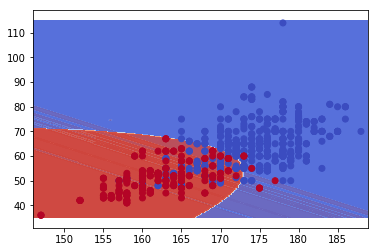

In [89]:
fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
priors = [0.25, 0.75]
models = [
            KNNClassifier(k=10),
            BayersGN(priors=priors)
         ]
models = [clf.fit(X_train[:,:2], y_train) for clf in models]
scores = np.array([model.score(X_test[:,:2], y_test) for model in models])
print(scores)
[plot_decision_boundary(sub, model=clf,X= X_train[:,:2],h=0.3) for clf in models]
sub.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm)

## 最近质心分类 & knn & GaussianBayers

[0.79069767 0.88372093 0.8372093 ]


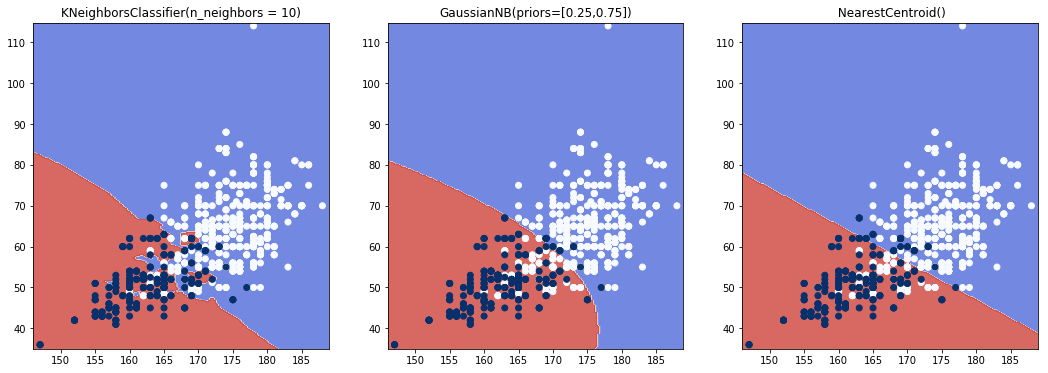

In [88]:
from sklearn.neighbors import NearestCentroid
fig = plt.figure(figsize=(18, 6)) 
axes = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133) ]
title = [
    "KNeighborsClassifier(n_neighbors = 10)",
            "GaussianNB(priors=[0.25,0.75])",
           " NearestCentroid()"
]
models = [
            KNeighborsClassifier(n_neighbors = n_neighbors),
            GaussianNB(priors=[0.25,0.75]),
            NearestCentroid()
         ]
models = [clf.fit(X_train[:,:2], y_train) for clf in models]
scores = np.array([model.score(X_test[:,:2], y_test) for model in models])
print(scores)
for i in range(3):
    plot_decision_boundary(axes[i], model=models[i],X= X_train[:,:2],h=0.3) 
    axes[i].scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Blues)
    axes[i].set_title(title[i])


## 剪辑近邻法

In [ ]:
from playML.model_selection import train_test_split
X, y = np.loadtxt("X_train.csv", delimiter=","),np.loadtxt("y_train.csv", delimiter=",")
fig = plt.figure(figsize=(18,6))
ax =fig.add_subplot(132)
ax.set_title("the original, n = 10, have %i samples"%len(y))
nums = [141,142,143,144]
models = [
            KNeighborsClassifier(n_neighbors = 10),
#             GaussianNB(priors=[0.25,0.75])
         ]
ax.scatter(X[:,0], X[:,1],c=y, cmap = plt.cm.Accent)
X_train, y_train = X[:,:2], y
err ,k = 1,1
plt.show()
while(err):
    fig = plt.figure(figsize=(18, 6))
    for i in range(len(nums)):
        # split into 2 parts
        X_train, X_test, y_train, y_test = train_test_split(X_train, y_train )#, seed=666)
        models = [clf.fit(X_train, y_train) for clf in models]
        y_pred = models[0].predict(X_test)
        # record predict_right nums and err nums
        t= sum(y_pred==y_test)
        err = len(y_test)-t
        ax = fig.add_subplot(nums[i])
        ax.set_title(" %ith, del %i, left %d, accu=%f"%((k), err, len(y_train)+t, t/len(y_test)))
        # combine the rest
        X_test, y_test = X_test[y_pred==y_test], y_test[y_pred==y_test]
        X_train, y_train = np.vstack((X_train, X_test)), np.hstack((y_train, y_test))
        # plot the decision_boundary
        [plot_decision_boundary(ax, model=clf,X= X_train[:,:2],h=0.3) for clf in models]
        # scatter the left samples
        ax.scatter(X_train[:,0], X_train[:,1],c=y_train, cmap = plt.cm.Accent)
        ax.set_xlabel("weight")
        ax.set_ylabel("height")
        k=k+1
    plt.show()

### 压缩法

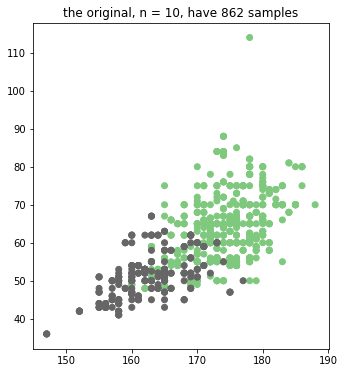

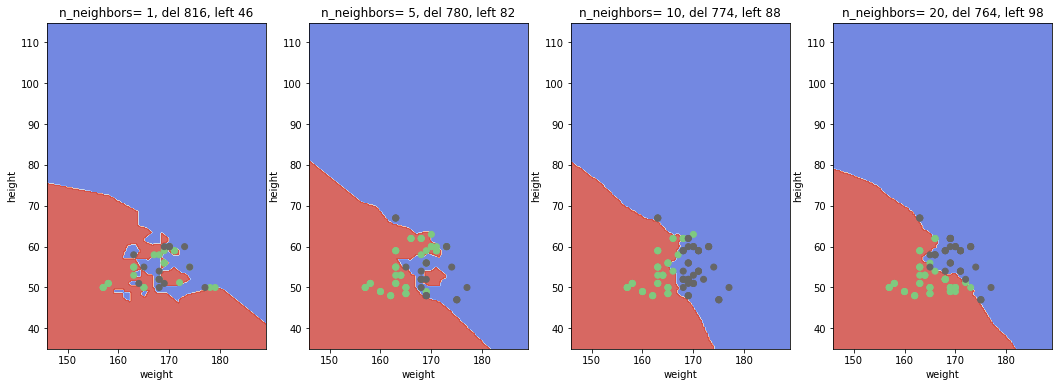

In [334]:
X, y = np.loadtxt("X_train.csv", delimiter=","),np.loadtxt("y_train.csv", delimiter=",")
fig = plt.figure(figsize=(18,6))
ax =fig.add_subplot(132)
ax.set_title("the original, n = 10, have %i samples"%len(y))
ax.scatter(X[:,0], X[:,1],c=y, cmap = plt.cm.Accent)
plt.show()
nums, n_neighbors = [141,142,143,144], [1, 5, 10, 20]
fig = plt.figure(figsize=(18,6))
for i in range(len(n_neighbors)):
    models = [
            KNeighborsClassifier(n_neighbors = n_neighbors[i]),
#             GaussianNB(priors=[0.25,0.75])
         ]
    index = np.ones(len(X), dtype=np.bool)
    for k in range(len(X)):
        # split into 2 parts
        index[k] = False
        models = [clf.fit(X[index,:2], y[index]) for clf in models]
        X_test, y_test = X[k,:2].reshape(1,-1), y[k].reshape(1,-1)
        y_pred = models[0].predict(X_test)
        if y_pred ==  y_test:
            index[k]=True
    # calc the deleted_numbers
    t = sum(index)
    err = len(X) - t
    # plot
    ax = fig.add_subplot(nums[i])
    ax.set_title("n_neighbors= %i, del %i, left %d"%(n_neighbors[i], t, err))
    # the left out
    X_train, y_train = X[index==False,:2], y[index==False]
    # plot the decision_boundary
    [plot_decision_boundary(ax, model=clf,X= X[:,:2],h=0.3) for clf in models]
    # scatter the left samples
    ax.scatter(X_train[:,0], X_train[:,1],c=y_train, cmap = plt.cm.Accent)
    ax.set_xlabel("weight")
    ax.set_ylabel("height")
plt.show()

## 3d knn & bayers


In [21]:
priors = [0.25, 0.75]
models = [
            KNNClassifier(k=10),
            BayersGN(priors=priors)
         ]
models = [clf.fit(X_train, y_train) for clf in models]
scores = np.array([model.score(X_test, y_test) for model in models])
print(scores)

[0.86046512 0.95348837]
